In [1]:
# Titanic - Machine Learning from Disaster
# Etapas:
# Importar bibliotecas e o dataset
# Descrição dos dados
# Tratamento dos dados
# Visualização dos dados
# Algoritmo de classifficação
# Avaliação do modelo

In [2]:
# 1. Import de bibliotecas para manipular os dados e criar gráficos

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
# 2. Descrição dos daods, buscar por inconsistência no dataset

In [5]:
# Visualisar quais tipos de dados serão usados

In [6]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
# Visualizar a média de quantos sobreviveram, média de idadei e seus quartis.

In [8]:
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [9]:
# Visualizar quais atributos possuem dados incompletos

In [10]:
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [11]:
# Antes de tratar os dados, compreender qual a relação de idade com a sobrevivência, pois alguns dados estão faltando
# Já a cabine será desconsiderada, uma vez que há muitos dados faltando
# Para o local de embarque, seus nulls serão substituidos pela moda

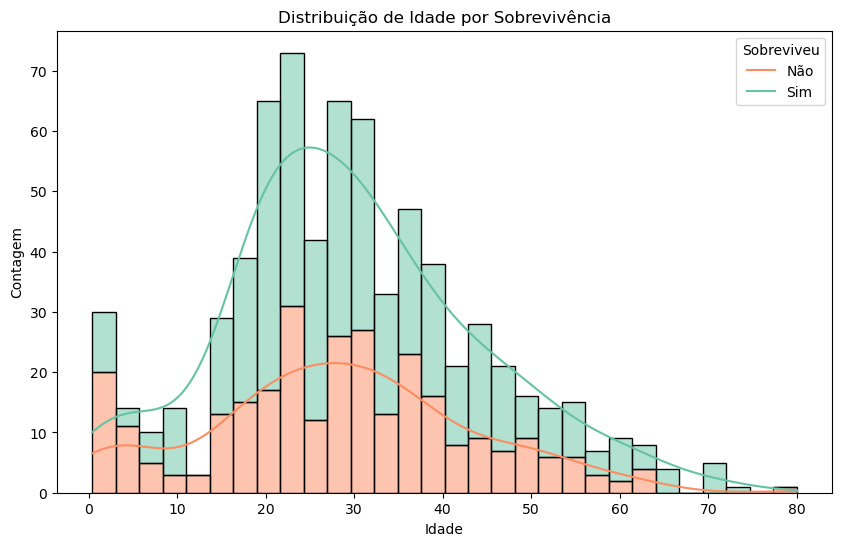

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='Age', hue='Survived', kde=True, bins=30, palette='Set2', multiple='stack')
plt.title('Distribuição de Idade por Sobrevivência')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()

In [13]:
bins = [0, 12, 40, 65, 100]

train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=bins, right=False)

AgeGroup
[0, 12)      57.352941
[12, 40)     39.337474
[40, 65)     39.473684
[65, 100)     9.090909
Name: Survived, dtype: float64


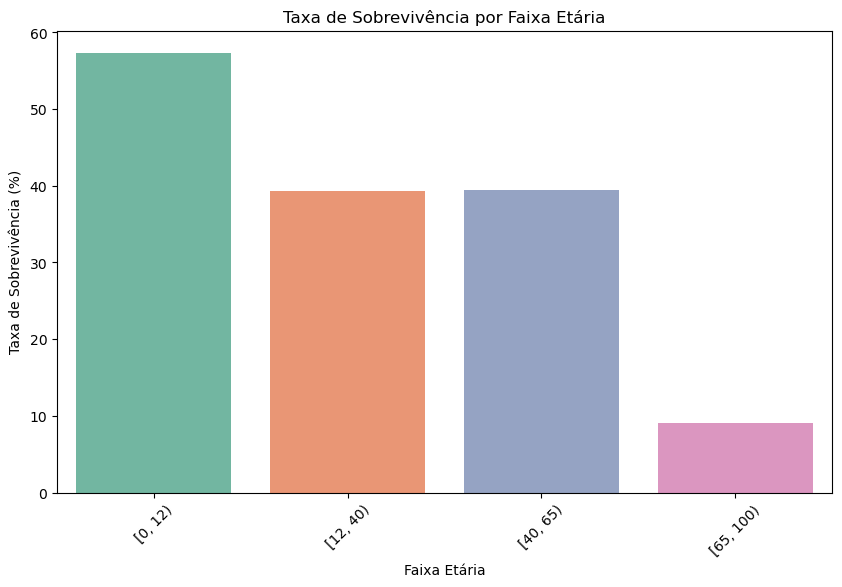

In [14]:
survival_rate_by_age = train_data.groupby('AgeGroup')['Survived'].mean() * 100

print(survival_rate_by_age)

plt.figure(figsize=(10, 6))
sns.barplot(x=survival_rate_by_age.index, y=survival_rate_by_age.values, palette='Set2')
plt.title('Taxa de Sobrevivência por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Sobrevivência (%)')
plt.xticks(rotation=45)
plt.show()

In [15]:
# A idade é um fator decisivo para a sobrevivência dos mais jovens, sendo estável para adultos e com uma queda na sobrevivência das idades 60+
# Logo, o tratamento utilizado para os valores null será substituir pela média.

In [16]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data.drop('AgeGroup', axis=1, inplace=True)
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
train_data.drop('Cabin', axis=1, inplace=True)

In [17]:
# O ID, nome e número da passagem serão desconsiderados, uma vez que não influenciam no resultado final.

In [18]:
train_data.drop('PassengerId', axis=1, inplace=True)
train_data.drop('Ticket', axis=1, inplace=True)
train_data.drop('Name', axis=1, inplace=True)

In [19]:
print(train_data.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [20]:
# Finalizado o tratamento dos dados de treino, é necessário fazer o mesmo para o dataset de teste
# Idade serátratado da mesma forma, assim como a cabine
# Entretanto aqui está faltando um valor de fare
# Será substituído pela média

In [21]:
print(test_data.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [22]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())
test_data.drop('Cabin', axis=1, inplace=True)

In [23]:
# 3. Visualização dos dados
# Tentar buscar por uma relação entre o valor pago pela passagem, local de embarque e sobrevivência

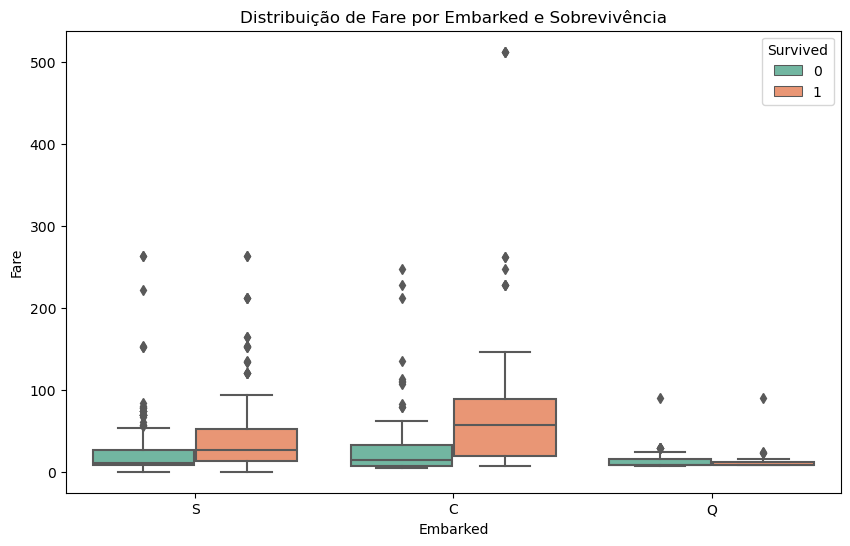

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Embarked', y='Fare', hue='Survived', data=train_data, palette='Set2')
plt.title('Distribuição de Fare por Embarked e Sobrevivência')
plt.show()

<Axes: >

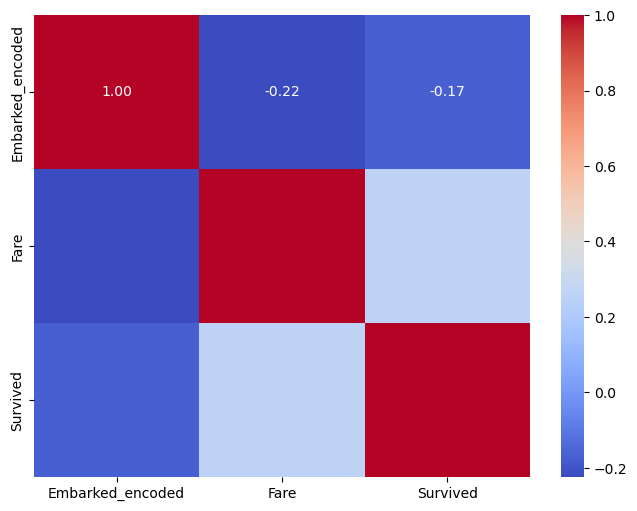

In [25]:
train_data['Embarked_encoded'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

correlation = train_data[['Embarked_encoded', 'Fare', 'Survived']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')

In [26]:
# É possível perceber que há uma pequena correlação entre preço maior de passagem e sobrevivência, mas não necessariamente com o porto de embarque
# Agora, a busca é por uma relação entre gênero e sobrevivência

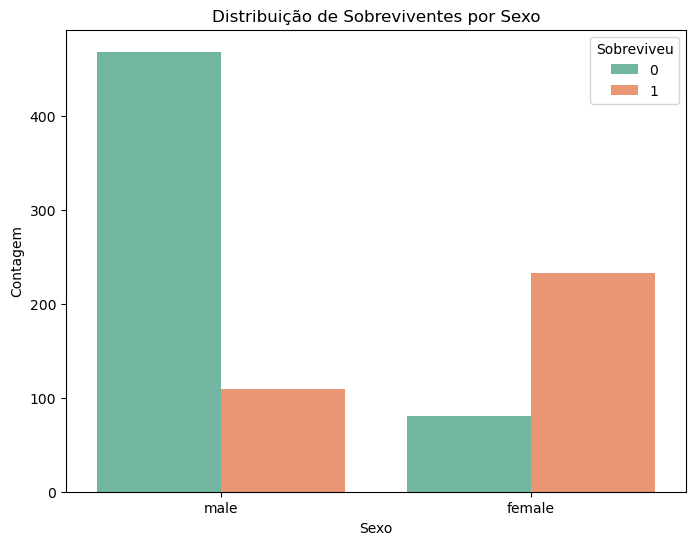

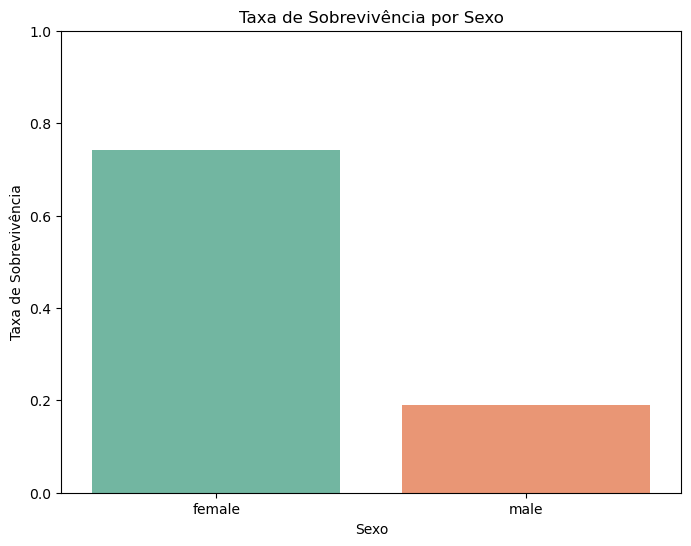

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue=train_data['Survived'].astype(str), data=train_data, palette='Set2')
plt.title("Distribuição de Sobreviventes por Sexo")
plt.xlabel("Sexo")
plt.ylabel("Contagem")
plt.legend(title='Sobreviveu')
plt.show()

survival_rate = train_data.groupby('Sex')['Survived'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=survival_rate, palette='Set2')
plt.title('Taxa de Sobrevivência por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Taxa de Sobrevivência')
plt.ylim(0, 1) 
plt.show()

In [28]:
# Fica evidente que este é um fator muito influente na sobrevivência ou não do passageiro

In [29]:
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data.drop('Embarked_encoded', axis=1, inplace=True)
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

<Axes: xlabel='Pclass', ylabel='Fare'>

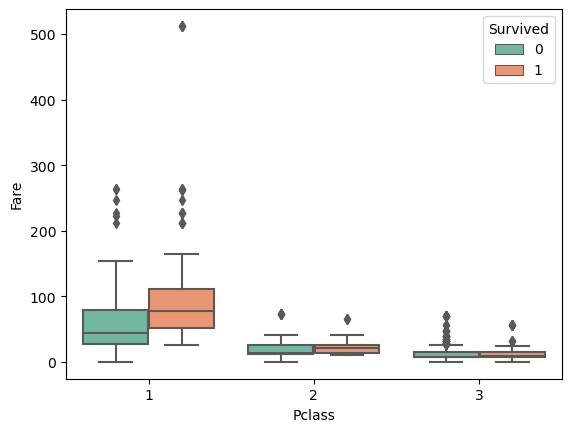

In [30]:
pclass_survived = train_data.groupby(['Pclass', 'Survived']).size().unstack()
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=train_data, palette='Set2')

In [31]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [32]:
# Definir os algoritmos utilizados, definir os parâmetros e treinar os modelos

In [33]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(max_depth=6, random_state=42)
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=100, random_state=42)

In [34]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X_train = train_data[features]
y_train = train_data['Survived']
X_test = test_data[features]

In [35]:
model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [36]:
model2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
# Avaliar o modelo a partir da validação cruzada

In [38]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model1, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-validation accuracy: {np.mean(scores):.4f}')


scores = cross_val_score(model2, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-validation accuracy: {np.mean(scores):.4f}')

Cross-validation accuracy: 0.8171
Cross-validation accuracy: 0.8149


In [39]:
# Ao final foi possível obter uma acurácia pouco acima de 80% em ambos algoritmos.